# Retail Sales Insights & KPI Analysis

This notebook presents a focused analysis of cleaned and modeled retail transaction data. It highlights key business metrics such as revenue trends, top-performing countries and customers, high-demand products, and potential outliers. The goal is to provide actionable insights for business stakeholders using visual exploration and aggregated views of the sales data.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import matplotlib.ticker as mtick

# Load the necessary files
base_path = Path("../data/warehouse")
fact_sales = pd.read_csv(base_path / "fact_sales.csv")
dim_customer = pd.read_csv(base_path / "dim_customer.csv")
dim_product = pd.read_csv(base_path / "dim_product.csv")
dim_date = pd.read_csv(base_path / "dim_date.csv")

# Merge for customer-based analysis
sales_customer = fact_sales.merge(dim_customer, on="customer_key", how="left")
# Merge for product-based analysis
sales_product = fact_sales.merge(dim_product, on="product_id", how="left")
# Merge for time-based analysis
sales_date = fact_sales.merge(dim_date, on="date_key", how="left")

### 1. Top 5 Countries by Total Revenue

,Country,TotalPrice
0,United Kingdom,7381447.72
1,EIRE,355790.48
2,Netherlands,268784.35
3,Germany,202025.39
4,France,146107.07


C:\Users\prakh\AppData\Local\Temp\ipykernel_68220\661285818.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="Country", y="TotalPrice", palette="viridis")


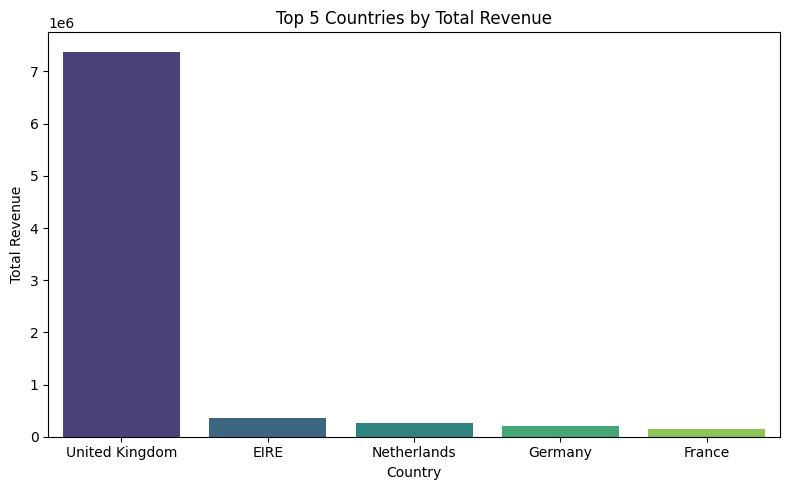

In [26]:
top_countries = sales_customer.groupby("Country")["TotalPrice"].sum().nlargest(5).reset_index()
display(top_countries)

plt.figure(figsize=(8, 5))
sns.barplot(data=top_countries, x="Country", y="TotalPrice", palette="viridis")
plt.title("Top 5 Countries by Total Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


### 2. Monthly Revenue Trend

,YearMonth,TotalPrice
0,2009-12,5.304992e+07
1,2010-01,2.362778e+07
2,2010-02,2.350623e+07
3,2010-03,3.856221e+07
4,2010-04,3.376476e+07
5,2010-05,3.408268e+07
6,2010-06,3.770713e+07
7,2010-07,3.222118e+07
8,2010-08,2.972404e+07
9,2010-09,5.601893e+07


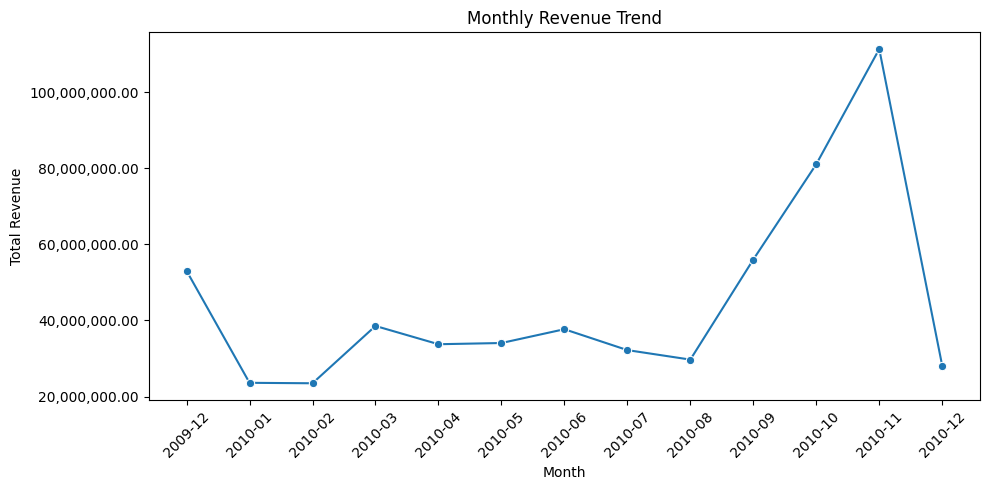

In [30]:
monthly_revenue = (
    sales_date.groupby(["year", "month"])["TotalPrice"].sum()
    .reset_index()
    .sort_values(["year", "month"])
)
monthly_revenue["YearMonth"] = monthly_revenue["year"].astype(str) + "-" + monthly_revenue["month"].astype(str).str.zfill(2)
display(monthly_revenue[["YearMonth", "TotalPrice"]])

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_revenue, x="YearMonth", y="TotalPrice", marker="o")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.2f}'))  # 2 decimal places
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


### 3. Top 10 Customers by Total Spend

,Customer ID,TotalPrice
0,18102,349164.35
1,14646,248396.50
2,14156,196549.74
3,14911,152121.22
4,13694,131443.19
5,17511,84541.17
6,15061,83284.38
7,16684,80489.21
8,16754,65500.07
9,17949,60117.60


C:\Users\prakh\AppData\Local\Temp\ipykernel_68220\2584650528.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x="Customer ID", y="TotalPrice", palette="coolwarm")


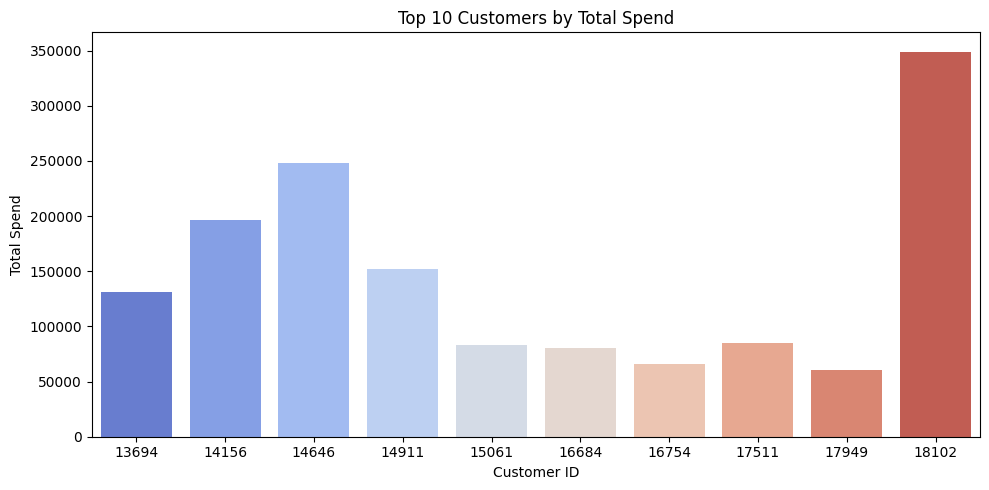

In [27]:
top_customers = sales_customer.groupby("Customer ID")["TotalPrice"].sum().nlargest(10).reset_index()
display(top_customers)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_customers, x="Customer ID", y="TotalPrice", palette="coolwarm")
plt.title("Top 10 Customers by Total Spend")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.tight_layout()
plt.show()


### 4. Most Frequently Purchased Products

,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,56805
1,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54610
2,BROCADE RING PURSE,48166
3,PACK OF 72 RETRO SPOT CAKE CASES,45129
4,ASSORTED COLOUR BIRD ORNAMENT,44431
5,60 TEATIME FAIRY CAKE CASES,35656
6,PACK OF 60 PINK PAISLEY CAKE CASES,30871
7,JUMBO BAG RED RETROSPOT,29519
8,SMALL POPCORN HOLDER,25703
9,BLACK AND WHITE PAISLEY FLOWER MUG,25685


C:\Users\prakh\AppData\Local\Temp\ipykernel_68220\2883489591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="Description", y="Quantity", palette="mako")


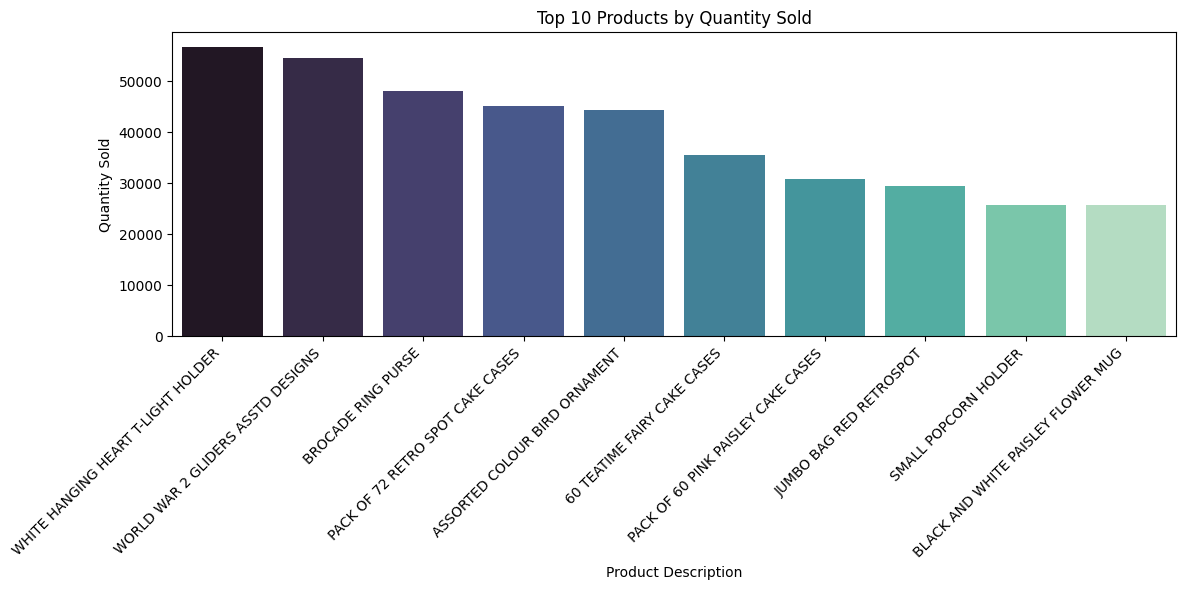

In [28]:
top_products = sales_product.groupby("Description")["Quantity"].sum().nlargest(10).reset_index()
display(top_products)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x="Description", y="Quantity", palette="mako")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product Description")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



### 5. Outlier Transactions with High Quantity or Price

,Invoice,Quantity,Price,TotalPrice
195,489460,576,0.21,120.96
534,489523,800,1.45,1160.00
4675,489996,504,0.55,277.20
5193,490018,4320,0.25,1080.00
5194,490018,5184,0.25,1296.00
5195,490018,4008,0.25,1002.00
5196,490018,4008,0.25,1002.00
5484,490059,600,3.00,1800.00
5485,490059,600,3.00,1800.00
5486,490059,576,3.00,1728.00


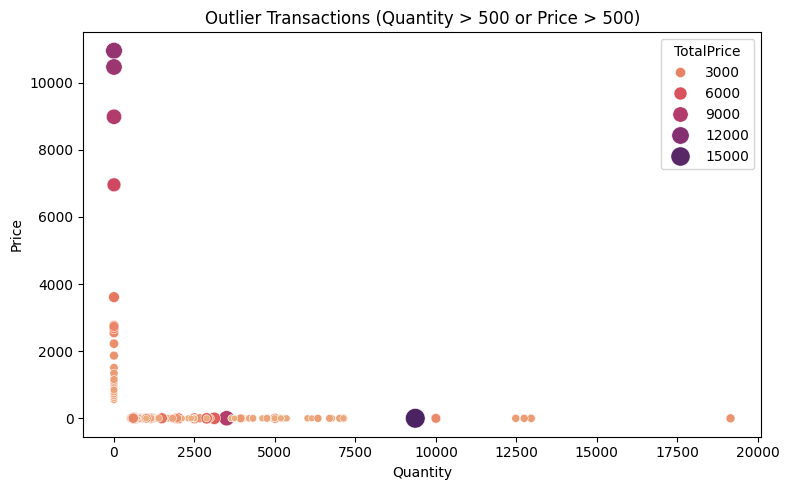

In [25]:
outliers = fact_sales[(fact_sales["Quantity"] > 500) | (fact_sales["Price"] > 500)][["Invoice", "Quantity", "Price", "TotalPrice"]]
display(outliers.head(10))  # Show only top 10 for readability

plt.figure(figsize=(8, 5))
sns.scatterplot(data=outliers, x="Quantity", y="Price", size="TotalPrice", hue="TotalPrice", palette="flare", sizes=(20, 200))
plt.title("Outlier Transactions (Quantity > 500 or Price > 500)")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.tight_layout()
plt.show()
